## Introduction
![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [87]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## 1. Temporal Patterns in Crime
Analyze how crime frequency changes by hour of the day, day of the week, or month. Visualizing these patterns can reveal peak times for criminal activity and help identify when interventions might be most effective.



### Crime Patterns Over Time

The following visualizations show how crime frequency in Los Angeles changes by month, day of the week, and hour of the day. These patterns help identify peak times for criminal activity and guide effective resource allocation for law enforcement.

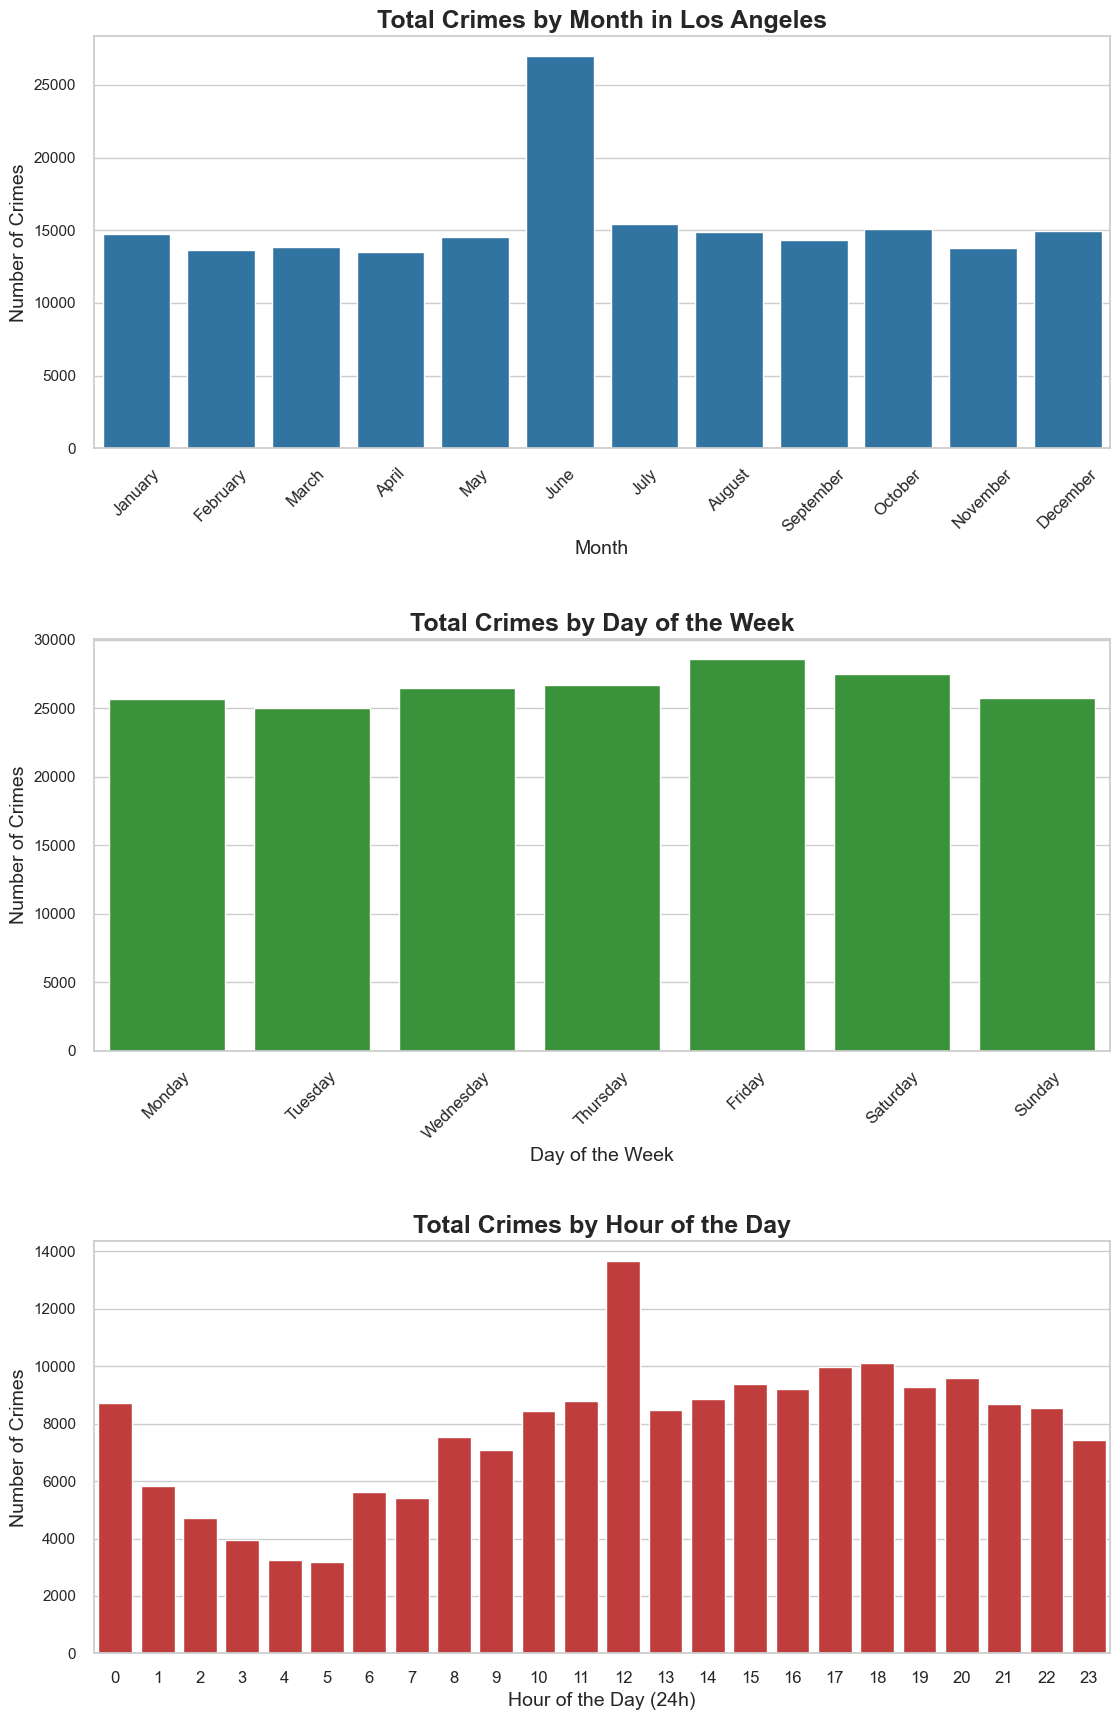

In [88]:
# Visualizing Temporal Patterns in Crime for Presentation
import calendar
crimes["DATE OCC"] = pd.to_datetime(crimes["DATE OCC"])
crimes["weekday"] = crimes["DATE OCC"].dt.day_name()
crimes["month"] = crimes["DATE OCC"].dt.month_name()
crimes["HOUR OCC"] = crimes["TIME OCC"].astype(int) // 100

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Month plot
month_order = list(calendar.month_name)[1:]  # January to December
sns.countplot(data=crimes, x="month",
              order=month_order,
              ax=ax[0], color="#1f77b4")
ax[0].set_title("Total Crimes by Month in Los Angeles", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Month", fontsize=14)
ax[0].set_ylabel("Number of Crimes", fontsize=14)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=12)

# Weekday plot
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=crimes, x="weekday",
              order=weekday_order,
              ax=ax[1], color="#2ca02c")
ax[1].set_title("Total Crimes by Day of the Week", fontsize=18, fontweight='bold')
ax[1].set_xlabel("Day of the Week", fontsize=14)
ax[1].set_ylabel("Number of Crimes", fontsize=14)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=12)

# Hour plot
sns.countplot(data=crimes, x="HOUR OCC", ax=ax[2], color="#d62728")
ax[2].set_title("Total Crimes by Hour of the Day", fontsize=18, fontweight='bold')
ax[2].set_xlabel("Hour of the Day (24h)", fontsize=14)
ax[2].set_ylabel("Number of Crimes", fontsize=14)
ax[2].tick_params(axis='x', labelsize=12)

plt.tight_layout(pad=3)
plt.savefig("plots/temporal_patterns.png", dpi=300)
plt.show()


## 3. Area-Based Crime Hotspots
Investigate which areas or neighborhoods experience the highest number of crimes. Mapping or plotting crime counts by area can uncover hotspots and guide resource allocation for law enforcement.

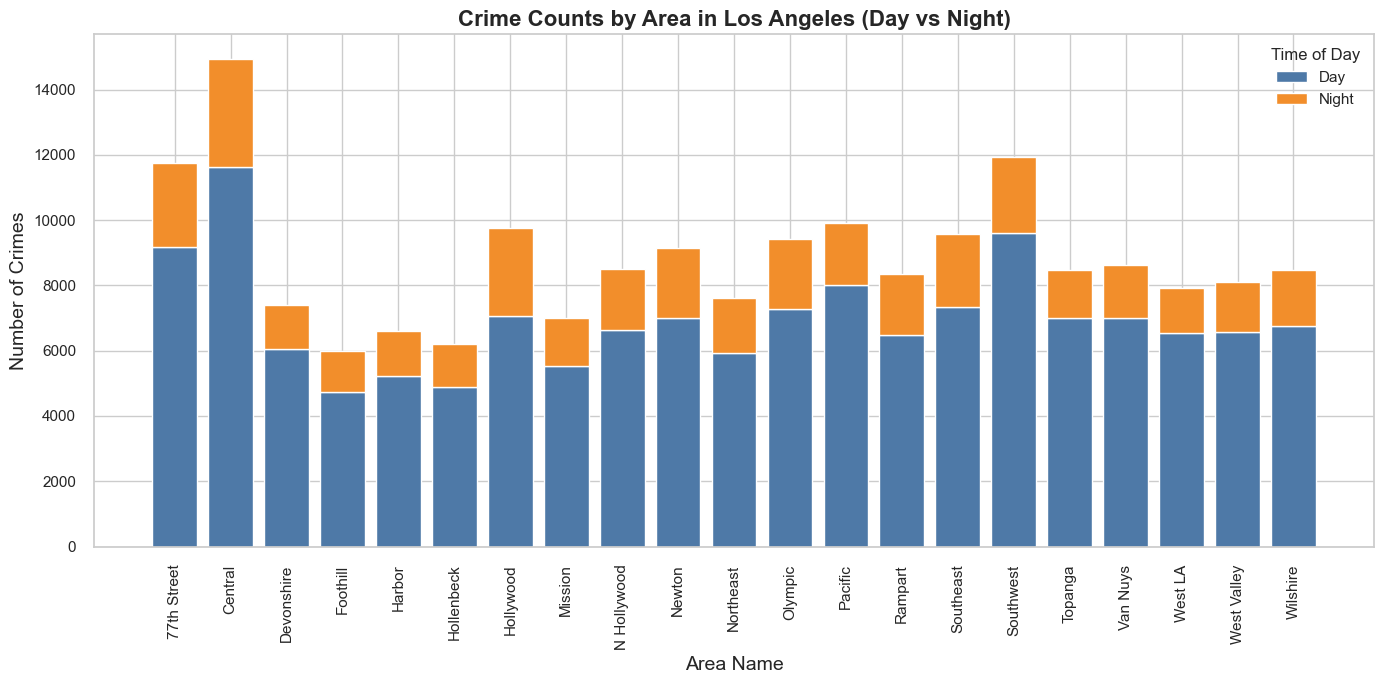

In [89]:
# Area-Based Crime Hotspots: True Stacked Bar Plot (Day vs Night)
# Define 'Time of Day' for each crime
crimes["Time of Day"] = np.where(
    (crimes['HOUR OCC'].astype(int) >= 22) | (crimes['HOUR OCC'].astype(int) < 4),
    "Night", "Day"
)

# Group by area and time of day, pivot for stacking
area_time_counts = crimes.groupby(["AREA NAME", "Time of Day"]).size().unstack(fill_value=0)

areas = area_time_counts.index
bar_width = 0.8

plt.figure(figsize=(14, 7))
plt.bar(areas, area_time_counts["Day"], label="Day", color="#4e79a7", width=bar_width)
plt.bar(areas, area_time_counts["Night"], bottom=area_time_counts["Day"], label="Night", color="#f28e2b", width=bar_width)
plt.xticks(rotation=90)
plt.title("Crime Counts by Area in Los Angeles (Day vs Night)", fontsize=16, fontweight='bold')
plt.xlabel("Area Name", fontsize=14)
plt.ylabel("Number of Crimes", fontsize=14)
plt.legend(title="Time of Day")
plt.tight_layout()
plt.savefig("plots/area_day_night.png", bbox_inches="tight")
plt.show()


## 4. Victim Age Group Analysis
Examine how the number of crimes varies across different victim age groups. Visualizing these counts will help identify which age groups are most affected and may inform targeted safety measures.

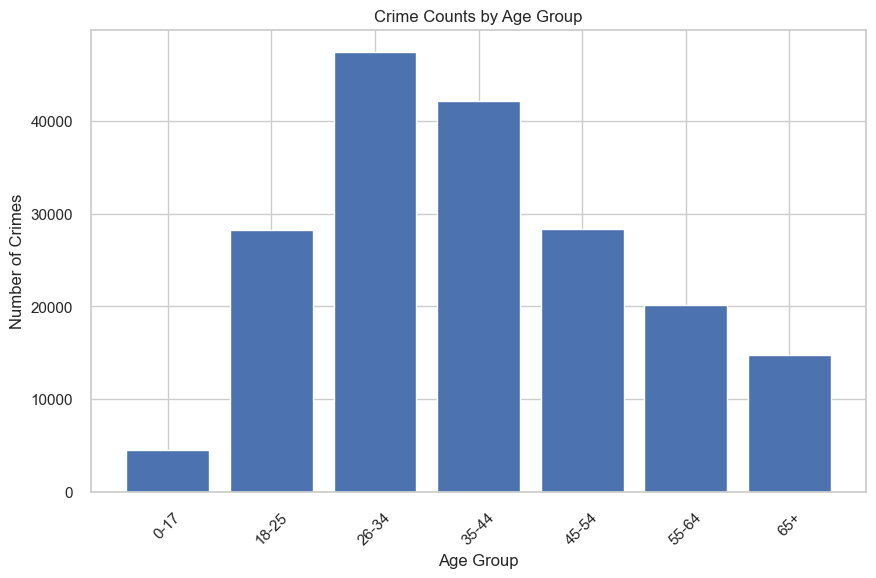

In [90]:
group_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
crimes['AGE GROUP'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=group_labels)
victim_ages = crimes['AGE GROUP'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(victim_ages.index.astype(str), victim_ages.values)
plt.title("Crime Counts by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.savefig("plots/age_group_counts.png", bbox_inches="tight")
plt.show()

## 5. Victim Sex Analysis
Examine how the number of crimes varies across different victim sex categories, both within each age group and overall. Visualizing these distributions will help identify which sex is most affected in different age ranges and reveal general patterns in victimization, informing targeted safety and prevention strategies.

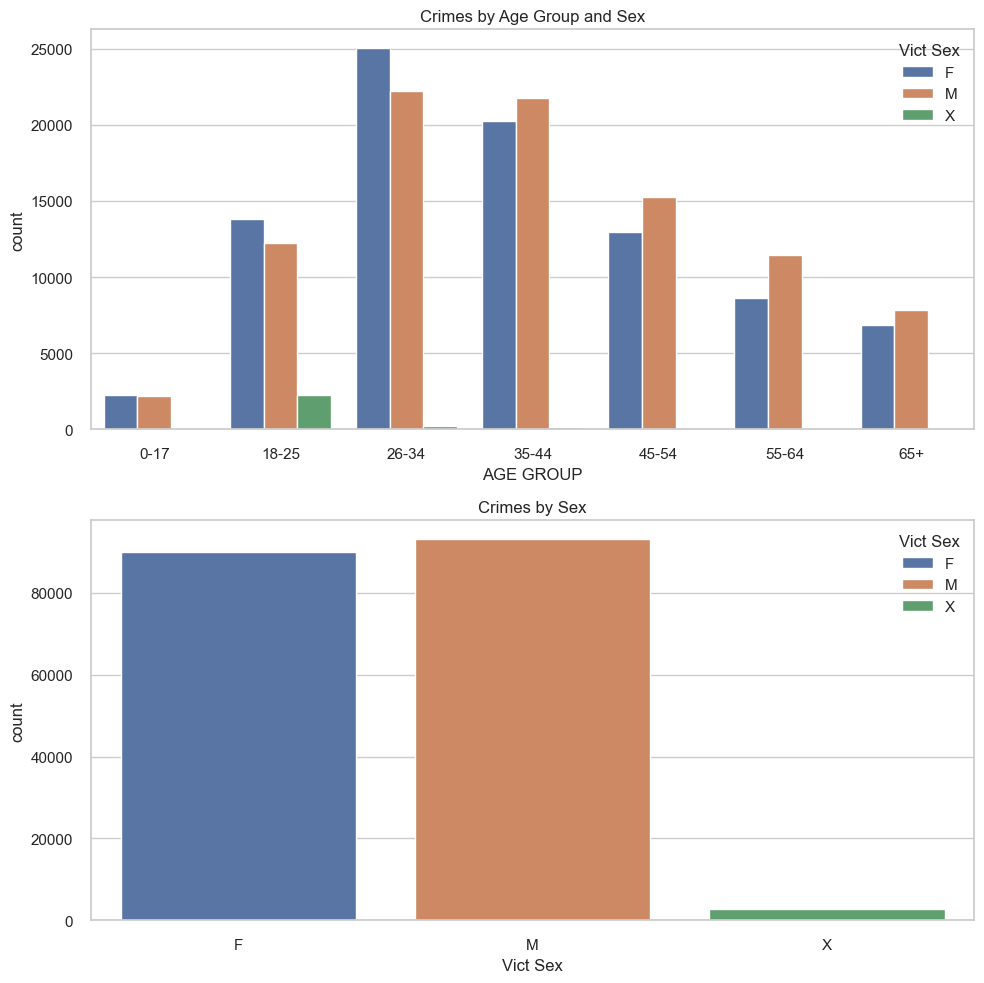

In [102]:
cat_changes = {"H":"X"}
crimes["Vict Sex"] = crimes["Vict Sex"].astype("category").replace(cat_changes).astype("category")
fig, ax = plt.subplots(2, 1,figsize=(10, 10))
sns.countplot(data=crimes, x="AGE GROUP", hue="Vict Sex", ax=ax[0])
ax[0].set_title("Crimes by Age Group and Sex")
sns.countplot(data=crimes, x="Vict Sex", hue="Vict Sex", ax=ax[1])
ax[1].set_title("Crimes by Sex")
plt.tight_layout()
plt.savefig("plots/crimes_by_age_and_sex.png")
plt.show()